<a href="https://colab.research.google.com/github/satya1410/Servo-Prediction/blob/main/SERVO_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SERVO PREDICTION MODEL USING LINEAR REGRESSION

OBJECTIVE

Objective of Servo prediction model is to predict Class of a vehicle based on its Motor, Screw, Pgain & Vgain.

DATA SOURCE
The dataset was taken from Kaggle which provides various kinds of dataset for projects.

Attributes in the dataset are -

Motor
Screw
Pgain
Vgain
Class

IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATA

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


DESCRIBE DATA

In [4]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [6]:
df.nunique()

Motor     5
Screw     5
Pgain     4
Vgain     5
Class    51
dtype: int64

In [8]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

DATA VISUALISATION

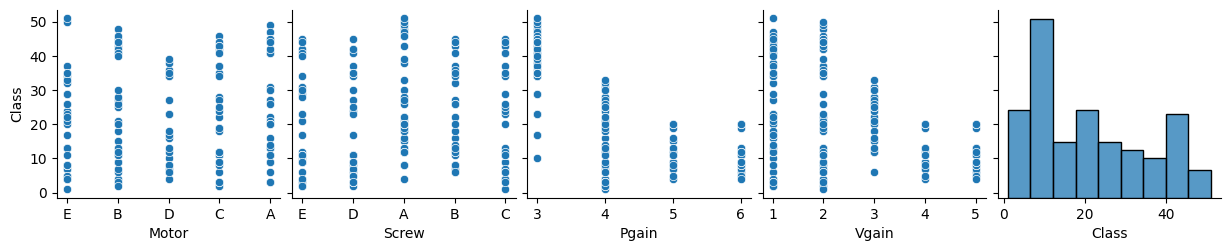

In [9]:
sns.pairplot(df, x_vars = ['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], y_vars = ['Class'])

<Axes: xlabel='Pgain', ylabel='Class'>

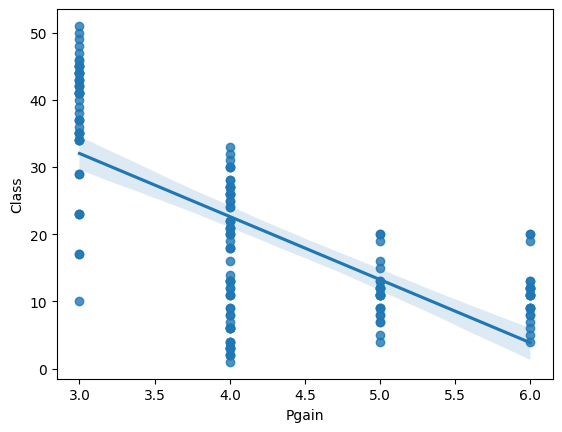

In [10]:
sns.regplot(x = 'Pgain' , y = 'Class' , data = df)

DATA PREPROCESSING

In [13]:
df.corr()

ValueError: could not convert string to float: 'E'

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [16]:
df.replace({'Motor' : {'A' : 0 , 'B' :1, 'C' : 2, 'D' : 3, 'E': 4}}, inplace = True)

In [17]:
df.replace({'Screw' : {'A' : 0 , 'B' :1, 'C' : 2, 'D' : 3, 'E': 4}}, inplace = True)

Define Target variable (y) & Feature variable (x)

In [18]:
y = df['Class']
y.shape

(167,)

In [19]:
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]
x.shape

(167, 4)

In [20]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


TRAIN TEST SPLIT

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train , y_test = train_test_split(x, y, train_size = 0.7 , random_state = 2529)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

MODELLING

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
lr.intercept_

79.29807295805837

In [27]:
lr.coef_

array([ -2.04322378,  -2.98953597, -14.59161593,   4.5836332 ])

PREDICTION

In [28]:
y_pred = lr.predict(x_test)

In [29]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

MODEL EVALUATION

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error

In [31]:
mean_squared_error(y_test, y_pred)

66.03589175595563

In [32]:
mean_absolute_error(y_test, y_pred)

7.190539677251235

In [33]:
mean_absolute_percentage_error(y_test, y_pred)

0.8268204638174629

EXPLAI[link text](https://)NATION

The Servo Prediction model is a control system that accurately positions or controls the motion of a mechanical device, such as a motor or actuator. It uses feedback to maintain a desired position or trajectory.

Python offers several libraries for building servo prediction models, including TensorFlow, Keras, PyTorch, and scikit-learn. These libraries provide the necessary tools and functions for data preprocessing, model training, and evaluation.

Building an accurate servo prediction model may involve an iterative process of collecting data, training the model, and evaluating its performance to refine and improve it.